# 图像直方图
直方图是反应图像的强度分布的图表。图表中，像素值范围为x轴，一般从0~255。对应像素数为y轴。

![](images/2023-08-11-15-09-34.png)

在分析画面的亮暗特征，人们经常把亮度区间定性地划分成暗调、阴影、中调、亮调、高光等几个区域，各区域的边界则可以根据应用特点灵活掌握。

![](images/2023-08-11-15-10-02.png)

当需要分析图像的颜色特性时，可以引入通道直方图（Channel Histogram），分别对R/G/B三个颜色通道进行直方图统计。

![](images/2023-08-11-15-10-14.png)

直方图有以下几个专用术语
- dims：要计算的通道数，对于灰度图dims=1，普通彩色图dims=3
- range：要计算的像素值范围，一般为[0,255]
- bins：子区段数目，如果我们统计0到255每个，bins=256；如果划分区间，比如0到15、16到31...240到255这样16个区间，bins=16

# 绘制直方图
## 使用opencv绘制直方图

**cv.calcHist(images, channels, mask, histSize, ranges)**
- images:图像列表，（图像格式为uint8或float32）。
- channels:同样需要用中括号括起来

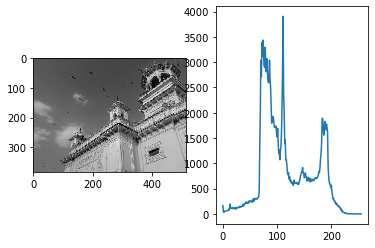

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("exp_images/home.jpg",0)
hist = cv.calcHist([img],[0],None,[256],[0,256])

plt.subplot(121),plt.imshow(img, cmap='gray')
plt.subplot(122),plt.plot(hist)
plt.show()

## 使用numpy统计直方图

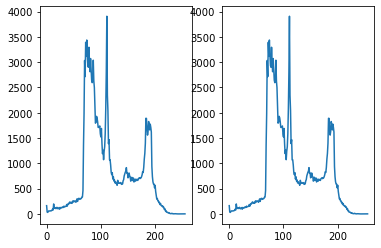

In [9]:
import numpy as np
hist1 = np.bincount(img.ravel(),minlength=256)
hist2, bins = np.histogram(img.ravel(),256,[0,256])
plt.subplot(1,2,1);plt.plot(hist1)
plt.subplot(1,2,2);plt.plot(hist2)
plt.show()

## 使用numpy统计直方图

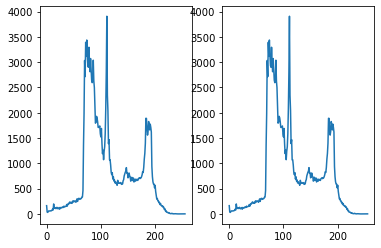

In [10]:
import numpy as np
hist1 = np.bincount(img.ravel(),minlength=256)
hist2, bins = np.histogram(img.ravel(),256,[0,256])
plt.subplot(1,2,1);plt.plot(hist1)
plt.subplot(1,2,2);plt.plot(hist2)
plt.show()

## 使用matplotlib绘制直方图

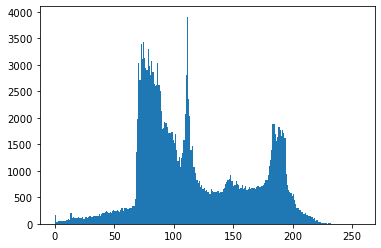

In [11]:
hist = plt.hist(img.ravel(),256,[0,256])
plt.show()

## 绘制bgr三通道直方图

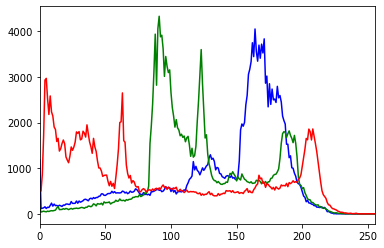

In [12]:
import cv2 as cv
import matplotlib.pyplot as plt

img_bgr = cv.imread("exp_images/home.jpg")
hist = cv.calcHist([img_bgr],[0],None,[256],[0,256])
plt.plot(hist,color='b')
hist = cv.calcHist([img_bgr],[1],None,[256],[0,256])
plt.plot(hist,color='g')
hist = cv.calcHist([img_bgr],[2],None,[256],[0,256])
plt.plot(hist,color='r')
plt.xlim([0,255])
plt.show()

# 直方图均衡化
处理图像时，当像素值限于特定值范围内时。例如，图像所有像素值在较高值区域，图像偏白。但是一幅好的图像通常在直方图上的分布比较均匀，直方图均衡化就是用来改善图像的全局亮度和对比度。

![](images/2023-08-11-15-10-38.png)

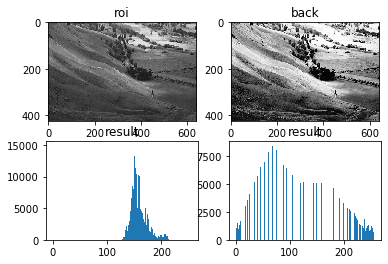

In [13]:
import cv2 as cv
import numpy as np
img = cv.imread('./exp_images/contrast75.png',0)

equ = cv.equalizeHist(img)
img = (img*0.4+120).astype(np.int)
plt.subplot(221),plt.imshow(img,cmap='gray');plt.title("roi")
plt.subplot(222),plt.imshow(equ,cmap='gray');plt.title("back")
plt.subplot(223),plt.hist(img.ravel(),256,[0,255]);plt.title("result")
plt.subplot(224),plt.hist(equ.ravel(),256,[0,255]);plt.title("result")
plt.show()

# 全局直方图均衡化
全局直方图均衡化是应用与整幅图片，但是在大多数情况下，这并不是一种很好的处理方法。

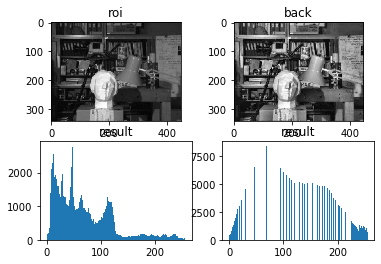

In [14]:
import cv2 as cv
import numpy as np
img = cv.imread('./exp_images/tsukuba.png',0)

clahe = cv.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
cl = clahe.apply(img)
plt.subplot(221),plt.imshow(img,cmap='gray');plt.title("roi")
plt.subplot(222),plt.imshow(cl,cmap='gray');plt.title("back")
plt.subplot(223),plt.hist(img.ravel(),256,[0,255]);plt.title("result")
plt.subplot(224),plt.hist(equ.ravel(),256,[0,255]);plt.title("result")
plt.show()